In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from itertools import combinations, permutations
import matplotlib.patches as mpatches
from sklearn.metrics import mean_squared_error
import random
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.decomposition import PCA
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import nbformat
import networkx as nx




# Testing Redundancy

In [16]:
np.random.seed(42)
n_samples = 1500

# Generate independent features
X1 = np.random.uniform(-1, 1, n_samples)


# Create redundancies
X2 = np.cosh(np.cos(np.tanh(X1))) + np.random.normal(0, 0.1, n_samples)  # Periodic
# X2 = np.sinh(np.exp(X1)) + np.random.normal(0, 0.1, n_samples)
# X2 = np.sin(np.cos(X1**3)) + np.random.normal(0, 0.1, n_samples)  # Double transformation
X3 = np.sin(X1) + np.random.normal(0, 0.1, n_samples)  # Piecewise
X4 = np.maximum(0, X1) + np.random.normal(0, 0.1, n_samples)  # ReLU
X5 = np.cosh(np.cos(np.tanh(X1)) + np.pi / 4) + np.random.normal(0, 0.1, n_samples)  # Periodic
X6 = 1 / (X1 + 1e-5) + np.random.normal(0, 0.1, n_samples)  # Reciprocal transformation


Y = X1 + np.random.normal(0, 0.02, n_samples)


df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6, 'Y': Y})
    

# Example dataset with exponential dependency
# df_exp = generate_dataset(dependency_type="exponential")
display(df.head())


,X1,X2,X3,X4,X5,X6,Y
0,-0.250920,-0.104138,-0.142301,-0.052466,3.040523,-4.097538,-0.281064
1,0.901429,0.804279,0.845915,0.950794,2.475215,1.033851,0.890294
2,0.463988,-0.432841,0.515875,0.593594,2.826546,2.158397,0.472563
3,0.197317,-0.258061,0.059443,0.086601,3.126820,4.895154,0.212726
4,-0.687963,-0.753379,-0.513770,-0.036551,2.553663,-1.451354,-0.644094


In [17]:
df.to_csv("temp.csv")


Analyzing X2...
Progress: 0/7239 compositions tested


/var/folders/1v/009sxz2s12d868sn9lp2mhq80000gn/T/ipykernel_37062/896928083.py:59: RuntimeWarning: overflow encountered in sinh
  result = funcs[f_name](a * result + b) + c
/var/folders/1v/009sxz2s12d868sn9lp2mhq80000gn/T/ipykernel_37062/896928083.py:59: RuntimeWarning: overflow encountered in exp
  result = funcs[f_name](a * result + b) + c
/var/folders/1v/009sxz2s12d868sn9lp2mhq80000gn/T/ipykernel_37062/896928083.py:43: RuntimeWarning: overflow encountered in exp
  'sigmoid': lambda x: 1 / (1 + np.exp(-x)),
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:118: RuntimeWarning: overflow encountered in multiply
  suf = s * uf
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:141: RuntimeWarning: invalid value encountered in scalar multiply
  alpha = max(0.001 * alpha_upper, (alpha_lower * alpha_upper)**0.5)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3

Progress: 1000/7239 compositions tested


/var/folders/1v/009sxz2s12d868sn9lp2mhq80000gn/T/ipykernel_37062/896928083.py:59: RuntimeWarning: overflow encountered in multiply
  result = funcs[f_name](a * result + b) + c
/var/folders/1v/009sxz2s12d868sn9lp2mhq80000gn/T/ipykernel_37062/896928083.py:59: RuntimeWarning: invalid value encountered in cos
  result = funcs[f_name](a * result + b) + c
/var/folders/1v/009sxz2s12d868sn9lp2mhq80000gn/T/ipykernel_37062/896928083.py:59: RuntimeWarning: invalid value encountered in tan
  result = funcs[f_name](a * result + b) + c


Progress: 2000/7239 compositions tested
Progress: 3000/7239 compositions tested
Progress: 4000/7239 compositions tested
Progress: 5000/7239 compositions tested


/var/folders/1v/009sxz2s12d868sn9lp2mhq80000gn/T/ipykernel_37062/896928083.py:16: RuntimeWarning: overflow encountered in square
  return np.sign(x) * (np.abs(x) ** n)
/var/folders/1v/009sxz2s12d868sn9lp2mhq80000gn/T/ipykernel_37062/896928083.py:16: RuntimeWarning: overflow encountered in power
  return np.sign(x) * (np.abs(x) ** n)


Progress: 6000/7239 compositions tested


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:115: RuntimeWarning: overflow encountered in power
  phi_prime = -np.sum(suf ** 2 / denom**3) / p_norm
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:154: RuntimeWarning: divide by zero encountered in scalar divide
  ratio = phi / phi_prime
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:166: RuntimeWarning: divide by zero encountered in scalar divide
  p *= Delta / norm(p)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/optimize/_lsq/common.py:166: RuntimeWarning: invalid value encountered in multiply
  p *= Delta / norm(p)


Progress: 7000/7239 compositions tested


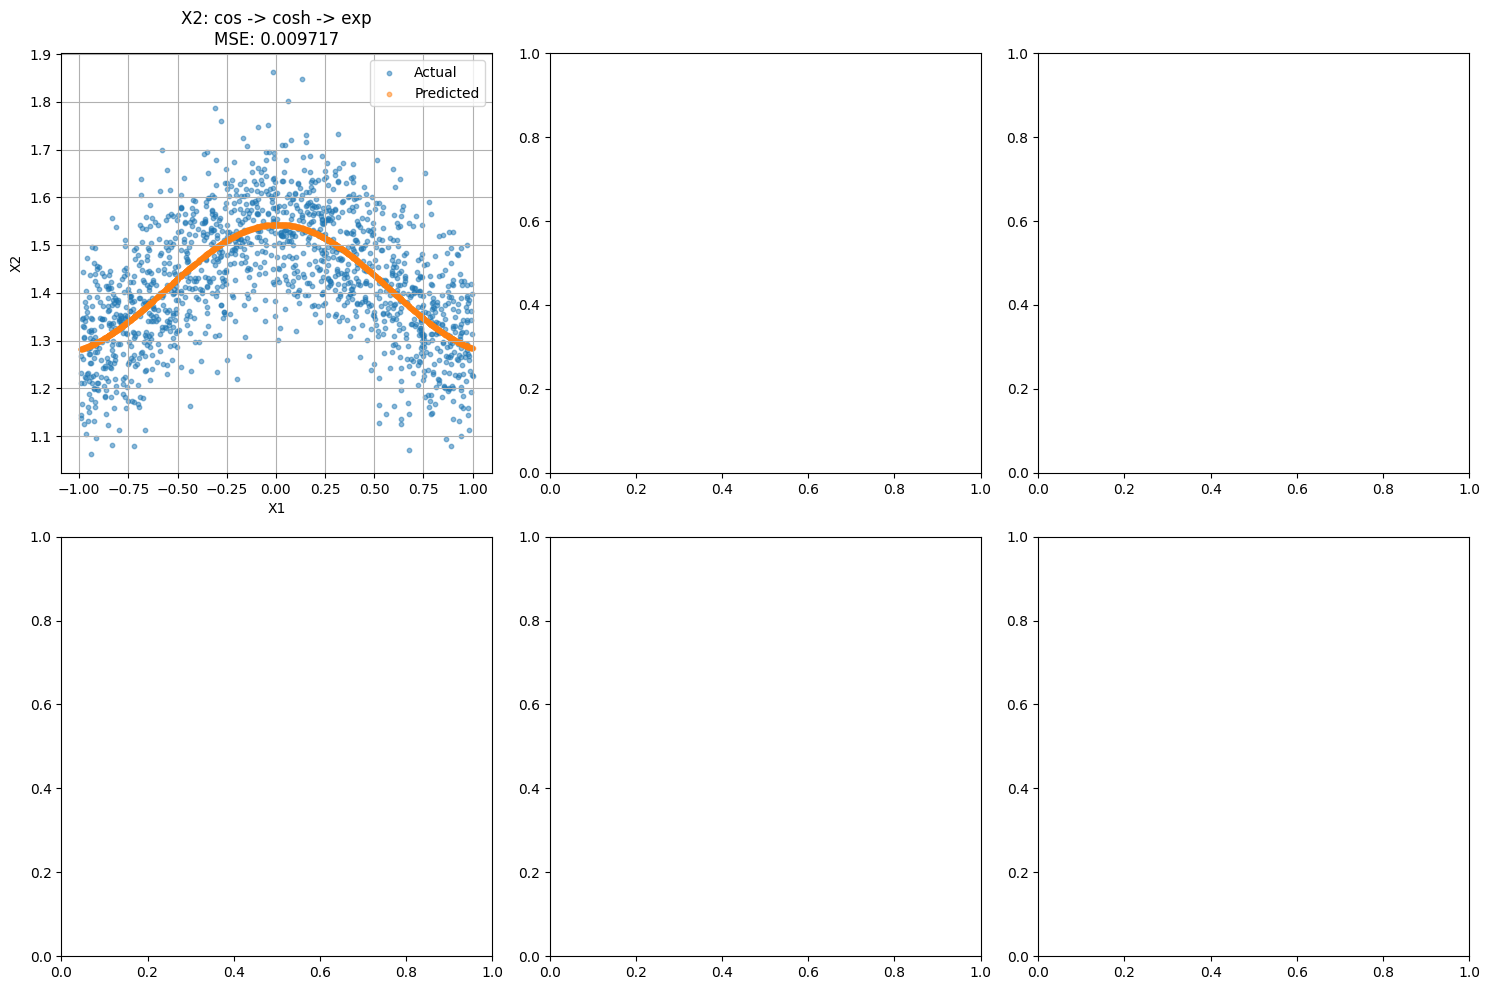


Top 5 compositions for X2:
  1. cos -> cosh -> exp
     MSE: 0.009717
     Parameters (a, b, c): [ 0.98226336 -0.0097165  -0.44123419]
  2. tanh -> cos -> cosh
     MSE: 0.009721
     Parameters (a, b, c): [ 0.99978361 -0.00777892  0.00549102]
  3. identity -> cosh -> reciprocal
     MSE: 0.009724
     Parameters (a, b, c): [ 1.47257213 -0.68765815  1.14000847]
  4. cos -> cube -> cosh
     MSE: 0.009724
     Parameters (a, b, c): [ 0.8047297  -0.00895577  0.18595776]
  5. sigmoid -> arctan -> sin
     MSE: 0.009725
     Parameters (a, b, c): [ 2.01764425 -0.88898122  0.54265611]


In [6]:
from scipy.optimize import curve_fit
import numpy as np
from itertools import product

# Expanded set of safe functions
def safe_log(x, eps=1e-5):
    return np.log(np.abs(x) + eps)

def safe_reciprocal(x, eps=1e-5):
    return 1 / (x + eps)

def safe_sqrt(x, eps=1e-5):
    return np.sqrt(np.abs(x) + eps)

def safe_power(x, n):
    return np.sign(x) * (np.abs(x) ** n)

def safe_arcsin(x):
    return np.arcsin(np.clip(x, -1, 1))

def safe_arccos(x):
    return np.arccos(np.clip(x, -1, 1))

# Expanded function set
funcs = {
    'log': safe_log,
    'sin': np.sin,
    'cos': np.cos,
    'tan': np.tan,
    'tanh': np.tanh,
    'sinh': np.sinh,
    'cosh': np.cosh,
    'arcsin': safe_arcsin,
    'arccos': safe_arccos,
    'arctan': np.arctan,
    'abs': np.abs,
    'sqrt': safe_sqrt,
    'square': lambda x: safe_power(x, 2),
    'cube': lambda x: safe_power(x, 3),
    'exp': np.exp,
    'reciprocal': safe_reciprocal,
    'relu': lambda x: np.maximum(0, x),
    'sigmoid': lambda x: 1 / (1 + np.exp(-x)),
    'identity': lambda x: x
}

# Rest of the code remains the same
def generate_compositions(max_depth=3):
    compositions = []
    for depth in range(1, max_depth + 1):
        for combo in product(funcs.keys(), repeat=depth):
            compositions.append(combo)
    return compositions

def create_composite(funcs_list):
    def composite(x, a, b, c):
        result = x
        for f_name in funcs_list:
            result = funcs[f_name](a * result + b) + c
        return result
    return composite

def find_relationships(X1, derived_features):
    results = {}
    compositions = generate_compositions()
    
    for feature_name, feature_values in derived_features.items():
        print(f"\nAnalyzing {feature_name}...")
        feature_results = []
        total_comps = len(compositions)
        
        for i, comp in enumerate(compositions):
            if i % 1000 == 0:  # Progress indicator
                print(f"Progress: {i}/{total_comps} compositions tested")
            try:
                composite = create_composite(comp)
                popt, _ = curve_fit(composite, X1, feature_values, p0=[1, 0, 0], 
                                  maxfev=1000, method='trf')
                y_pred = composite(X1, *popt)
                mse = np.mean((feature_values - y_pred) ** 2)
                feature_results.append({
                    'composition': comp,
                    'mse': mse,
                    'params': popt,
                    'function': composite
                })
            except:
                continue
        
        # Sort by MSE
        feature_results.sort(key=lambda x: x['mse'])
        results[feature_name] = feature_results
    
    return results

# Run analysis for each derived feature
derived_features = {
    'X2': df['X2'],
    # 'X3': df['X3'],
    # 'X4': df['X4'],
    # 'X5': df['X5'],
    # 'X6': df['X6']
}

relationships = find_relationships(df['X1'].values, derived_features)

# Plot results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (feature_name, results) in enumerate(relationships.items()):
    if idx >= len(axes):
        break
        
    best_fit = results[0]
    y_pred = best_fit['function'](df['X1'].values, *best_fit['params'])
    
    axes[idx].scatter(df['X1'], derived_features[feature_name], alpha=0.5, label='Actual', s=10)
    axes[idx].scatter(df['X1'], y_pred, alpha=0.5, label='Predicted', s=10)
    axes[idx].set_xlabel('X1')
    axes[idx].set_ylabel(feature_name)
    axes[idx].set_title(f"{feature_name}: {' -> '.join(best_fit['composition'])}\nMSE: {best_fit['mse']:.6f}")
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

# Print detailed results
for feature_name, results in relationships.items():
    print(f"\nTop 5 compositions for {feature_name}:")
    for i, result in enumerate(results[:5]):
        print(f"  {i+1}. {' -> '.join(result['composition'])}")
        print(f"     MSE: {result['mse']:.6f}")
        print(f"     Parameters (a, b, c): {result['params']}")

In [7]:
for feature_name, results in relationships.items():
    print(f"\nTop 5 compositions for {feature_name}:")
    for i, result in enumerate(results[:10]):
        print(f"  {i+1}. {' -> '.join(result['composition'])}")
        print(f"     MSE: {result['mse']:.6f}")
        print(f"     Parameters (a, b, c): {result['params']}")


Top 5 compositions for X2:
  1. cos -> cosh -> exp
     MSE: 0.009717
     Parameters (a, b, c): [ 0.98226336 -0.0097165  -0.44123419]
  2. tanh -> cos -> cosh
     MSE: 0.009721
     Parameters (a, b, c): [ 0.99978361 -0.00777892  0.00549102]
  3. identity -> cosh -> reciprocal
     MSE: 0.009724
     Parameters (a, b, c): [ 1.47257213 -0.68765815  1.14000847]
  4. cos -> cube -> cosh
     MSE: 0.009724
     Parameters (a, b, c): [ 0.8047297  -0.00895577  0.18595776]
  5. sigmoid -> arctan -> sin
     MSE: 0.009725
     Parameters (a, b, c): [ 2.01764425 -0.88898122  0.54265611]
  6. arctan -> cos -> cosh
     MSE: 0.009726
     Parameters (a, b, c): [ 0.99205937 -0.01065755  0.01037031]
  7. cosh -> reciprocal -> sqrt
     MSE: 0.009727
     Parameters (a, b, c): [ 2.30836943 -0.0270387   0.32697513]
  8. cos -> log -> cosh
     MSE: 0.009737
     Parameters (a, b, c): [ 1.12737434 -0.01350607  0.27947907]
  9. sin -> cos -> cosh
     MSE: 0.009739
     Parameters (a, b, c): [ 0.968

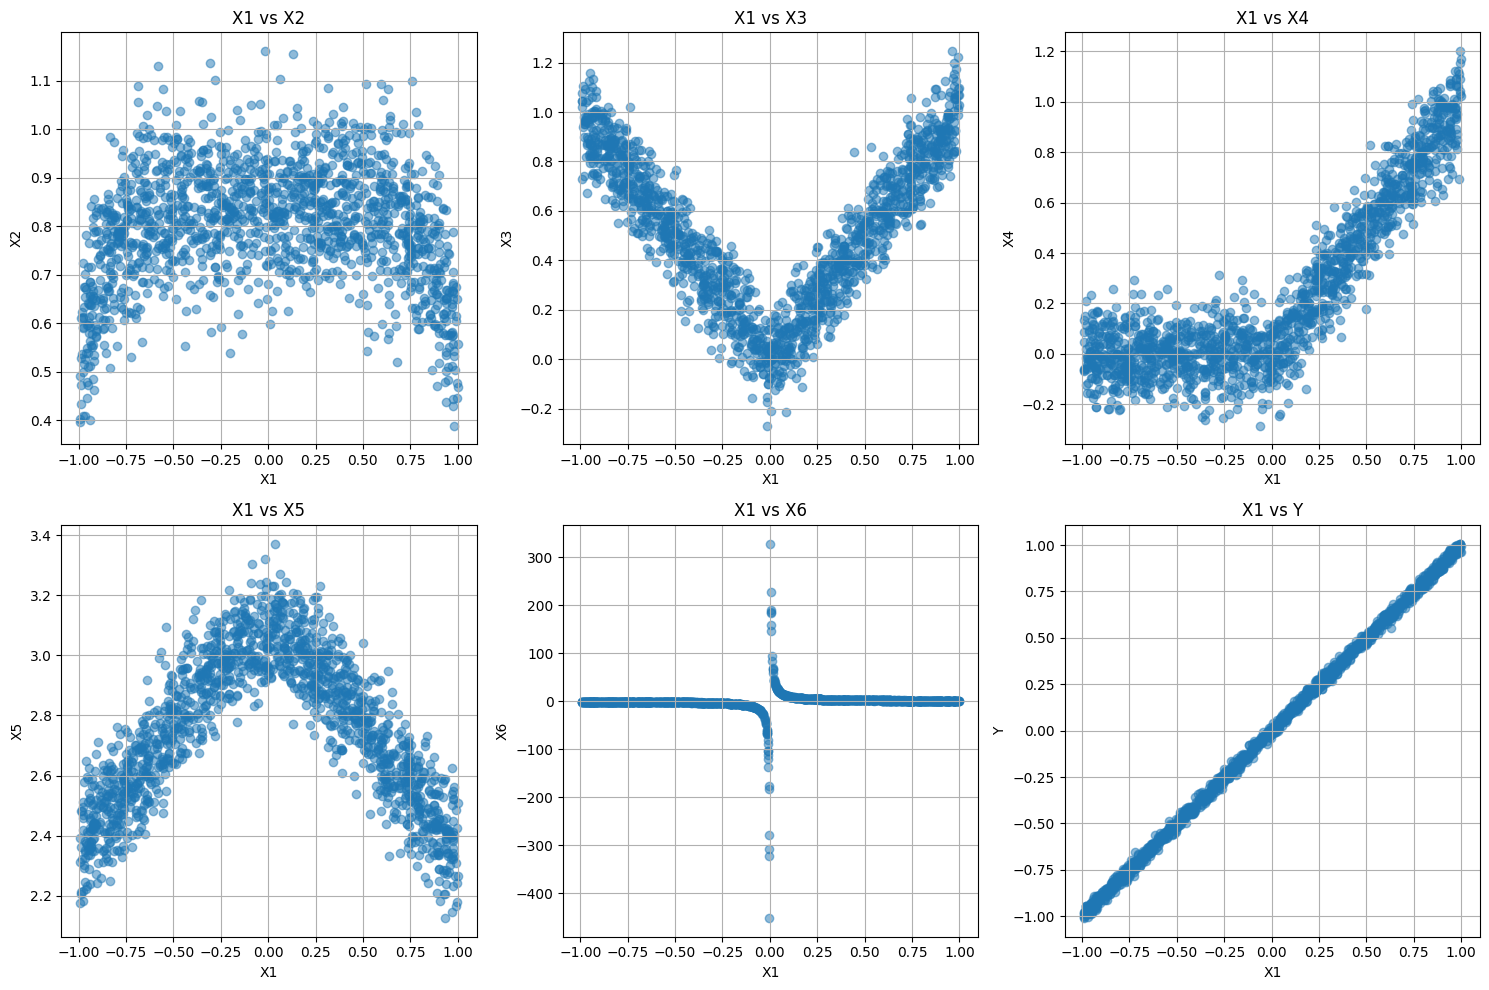

In [11]:
# plot X1 against all other features
# Create a figure with subplots for each feature comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

# Plot X1 against each other feature
for idx, feature in enumerate(['X2', 'X3', 'X4', 'X5', 'X6', 'Y']):
    axes[idx].scatter(df['X1'], df[feature], alpha=0.5)
    axes[idx].set_xlabel('X1')
    axes[idx].set_ylabel(feature)
    axes[idx].set_title(f'X1 vs {feature}')
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

# Testing Dependency

In [50]:
def generate_dataset(dependency_type, n_samples=1500, threshold=0.2):
    """
    Generates a dataset based on the specified dependency type.
    
    Parameters:
        dependency_type (str): Type of functional relationship ('trigonometric', 'exponential', 
                               'threshold_max', 'threshold_conditional', 'power').
        n_samples (int): Number of samples to generate.
        threshold (float): Threshold for conditional dependency.

    Returns:
        pd.DataFrame: Dataset with selected dependency type.
    """

    np.random.seed(42)
    
    # Generate independent features
    X1 = np.random.uniform(0, 1, n_samples)
    X2 = np.random.uniform(0, 1, n_samples)
    X3 = np.random.uniform(0, 1, n_samples)
    
    
    # Generate Y based on dependency type
    if dependency_type == "trigonometric":
        Y = X1 * np.sin(X2) + np.random.normal(0, 0.05, n_samples)
    elif dependency_type == "simple":
        Y = (X1 * X2 * X3) + np.random.normal(0, 0.05, n_samples)
    elif dependency_type == "threshold_max":
        Y = np.maximum(X1, X2) + np.random.normal(0, 0.05, n_samples)
    elif dependency_type == "threshold_conditional":
        Y = np.where(X1 > threshold, X1 * X2, 0) + np.random.normal(0, 0.05, n_samples)
    elif dependency_type == "power":
        Y = X1 * (X2 ** 2) + np.random.normal(0, 0.05, n_samples)
    else:
        raise ValueError("Invalid dependency type. Choose from ['trigonometric', 'exponential', 'threshold_max', 'threshold_conditional', 'power']")
    
    
    
    # add filler features
    X3 = np.random.uniform(-1, 1, n_samples) + np.random.normal(0, 0.1, n_samples)
    X4 = np.random.uniform(-1, 1, n_samples) + np.random.normal(0, 0.1, n_samples)
    X5 = np.random.uniform(-1, 1, n_samples) + np.random.normal(0, 0.1, n_samples)
    X6 = np.random.uniform(-1, 1, n_samples) + np.random.normal(0, 0.1, n_samples)
    
    # Create DataFrame
    df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6, 'Y': Y})
    
    return df

# Example: Generate a dataset with an exponential dependency
dependency_type = "simple"  # Change this to test different dependencies
df = generate_dataset(dependency_type)

display(df.sample(10))

,X1,X2,X3,X4,X5,X6,Y
832,0.140857,0.603795,-0.169286,-0.163655,-0.284142,-0.751505,0.039675
191,0.897216,0.502566,0.685891,-0.741313,-0.713563,-0.018287,0.420440
743,0.502720,0.995438,0.434765,0.658988,-0.375256,-0.604325,-0.048532
1307,0.801728,0.161671,0.573996,0.345469,-0.081796,-0.251168,0.074594
677,0.397856,0.642882,0.505347,0.127836,-0.803800,0.679286,0.097558
616,0.061078,0.440323,-0.043068,0.022840,0.261372,0.605452,0.064293
49,0.184854,0.633151,0.975346,0.776871,-0.599597,-0.195964,-0.005024
286,0.465598,0.636670,0.101512,-0.241592,0.542387,-0.090155,0.066562
1013,0.039427,0.510432,0.042451,-0.370336,0.882800,-0.069335,-0.024639
1079,0.949961,0.647817,-0.579872,-0.301797,-0.184197,-0.654113,0.112283


# Testing MIX

In [38]:
np.random.seed(45)
n_samples = 1500

# Generate independent features
X1 = np.random.uniform(-1, 1, n_samples)
X2 = X1 + np.random.normal(0, 0.1, n_samples)

X3 = np.random.uniform(-1, 1, n_samples)


Y = X1 * X3 + np.random.normal(0, 0.02, n_samples)


X4 = np.cos(X1) + np.random.normal(0, 0.1, n_samples)
X5 = np.random.uniform(-1, 1, n_samples)
X6 = np.random.uniform(-1, 1, n_samples)

df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3, 'X4': X4, 'X5': X5, 'X6': X6, 'Y': Y})
    

# Example dataset with exponential dependency
# df_exp = generate_dataset(dependency_type="exponential")
display(df.head())


,X1,X2,X3,X4,X5,X6,Y
0,0.978023,0.926327,0.501231,0.630416,-0.361335,-0.451764,0.484926
1,0.099089,-0.040956,-0.027702,1.054831,-0.753673,-0.817189,-0.010674
2,-0.437105,-0.532547,0.526617,1.012433,-0.421492,-0.327178,-0.242234
3,-0.845421,-0.678780,0.975453,0.848907,-0.331246,0.388208,-0.816162
4,-0.111061,-0.144100,-0.138082,0.813650,0.609651,0.340657,0.003815


In [57]:
# write to csv 
df.to_csv("test_4.csv", index=False)

In [76]:
def generate_three_feature_dataset(relationship_type, n_samples=1500, noise=0.05, num_filler_features=3):
    """
    Generates a dataset with three core features (X1, X2, X3) exhibiting a specific dependency or redundancy,
    along with additional unrelated filler features.

    Parameters:
        relationship_type (str): The type of relationship to encode. Options:
                                 ['multiplicative', 'threshold', 'power', 'linear_redundant', 'nonlinear_redundant']
        n_samples (int): Number of samples in the dataset.
        noise (float): Standard deviation of Gaussian noise to introduce randomness.
        num_filler_features (int): Number of filler features to generate.

    Returns:
        pd.DataFrame: A DataFrame with three main features (X1, X2, X3), target (Y), and filler features.
    """
    np.random.seed(42)
    
    # Generate independent features for dependency testing
    X1 = np.random.uniform(-1, 1, n_samples)
    X2 = np.random.uniform(-1, 1, n_samples)
    X3 = np.random.uniform(-1, 1, n_samples)

    # Apply the chosen relationship
    if relationship_type == "multiplicative":
        Y = X1 * X2 * X3 + np.random.normal(0, noise, n_samples)
    
    elif relationship_type == "threshold":
        Y = np.where(X3 > 0.5, X1 * X2, X2 * X3) + np.random.normal(0, noise, n_samples)
    
    elif relationship_type == "power":
        Y = X1**2 + X2**2 + X3**2 + np.random.normal(0, noise, n_samples)
    
    elif relationship_type == "linear_redundant":
        X3 = 0.8 * X1 + 0.2 * X2 + np.random.normal(0, noise, n_samples)
        Y = X1 + X2 + np.random.normal(0, noise, n_samples)
    
    elif relationship_type == "nonlinear_redundant":
        X3 = np.sin(X1 + X2) + np.random.normal(0, noise, n_samples)
        Y = X1 + X2 + np.random.normal(0, noise, n_samples)

    else:
        raise ValueError("Invalid relationship_type. Choose from ['multiplicative', 'threshold', 'power', 'linear_redundant', 'nonlinear_redundant']")
    
    # Generate unrelated filler features (ensuring they are NOT related to X1, X2, or X3)
    filler_features = {
        f'F{i+1}': np.random.normal(0, 1, n_samples)  # Random Gaussian distribution
        for i in range(num_filler_features)
    }

    # Create DataFrame
    df = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3,**filler_features, 'Y': Y, })
    
    return df

# Example: Generate a dataset with a threshold dependency and additional filler features
relationship_type = "multiplicative"  # Change to test different cases
df = generate_three_feature_dataset(relationship_type, num_filler_features=4)


df.head()

,X1,X2,X3,F1,F2,F3,F4,Y
0,-0.250920,0.038164,0.345406,0.341660,0.397397,-0.423691,0.555826,0.014028
1,0.901429,-0.041636,0.593363,-0.271315,-0.747456,-0.489156,-0.226527,0.103308
2,0.463988,-0.948716,-0.499064,-1.216581,-0.280502,-0.537979,-0.430428,0.127681
3,0.197317,-0.317504,0.249748,-1.121530,-1.402866,0.466445,2.008473,-0.017261
4,-0.687963,-0.239609,0.143492,0.709353,-0.108139,0.079048,-1.472354,0.055681


In [77]:
def analyze_feature_impacts(df, feature_list, target='Y', model_type='linear', poly_degree=2):
    """
    Evaluates all feature combinations and analyzes incremental impact of each feature addition using different models.
    
    Parameters:
    - df: DataFrame containing the dataset
    - feature_list: List of feature names to consider
    - target: The target variable (default: 'Y')
    - model_type: The model to use ('linear', 'poly', 'rf', 'mlp')
    - poly_degree: Degree for polynomial regression (default: 2)
    
    Returns:
    - combinations_df: DataFrame containing MSE for each feature combination
    - impact_df: DataFrame analyzing feature importance through MSE reduction
    """
    
    # First get all combinations and their MSEs
    combinations_results = []
    for r in range(1, len(feature_list) + 1):
        for feature_combo in combinations(feature_list, r):
            X = df[list(feature_combo)]
            y = df[target]
            
            scaler = StandardScaler()
            X_scaled = scaler.fit_transform(X)
            
            X_train, X_test, y_train, y_test = train_test_split(
                X_scaled, y, test_size=0.2, random_state=42
            )
            
            # Choose model
            if model_type == 'linear':
                model = LinearRegression()
            elif model_type == 'poly':
                poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
                X_train = poly.fit_transform(X_train)
                X_test = poly.transform(X_test)
                model = LinearRegression()
            elif model_type == 'rf':
                model = RandomForestRegressor(n_estimators=200, random_state=42)
            elif model_type == 'mlp':
                model = MLPRegressor(hidden_layer_sizes=(20), activation='relu', max_iter=500, random_state=42)
            else:
                raise ValueError("Invalid model_type. Choose from 'linear', 'poly', 'rf', or 'mlp'.")

            # Train and evaluate
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            
            combinations_results.append({
                'features': feature_combo,
                'num_features': len(feature_combo),
                'mse': mse,
                'rmse': np.sqrt(mse)
            })
    
    # Create impact analysis
    impact_results = []
    for result in combinations_results:
        if len(result['features']) > 1:
            current_mse = result['mse']
            current_features = set(result['features'])
            
            # Find the MSE for each subset with one feature removed
            for feature in result['features']:
                subset_features = current_features - {feature}
                
                # Find the corresponding base MSE
                base_mse = next(r['mse'] for r in combinations_results 
                              if set(r['features']) == subset_features)
                
                impact_results.append({
                    'base_features': tuple(sorted(subset_features)),
                    'added_feature': feature,
                    'final_features': result['features'],
                    'base_mse': base_mse,
                    'new_mse': current_mse,
                    'mse_reduction': base_mse - current_mse,
                    'relative_improvement': ((base_mse - current_mse) / base_mse) * 100
                })
    
    # Convert to DataFrame and sort by MSE reduction
    impact_df = pd.DataFrame(impact_results).sort_values('mse_reduction', ascending=False)
    
    # Convert combinations results to DataFrame
    combinations_df = pd.DataFrame(combinations_results).sort_values('mse')
    
    return combinations_df, impact_df


# List of features for diabetes dataset
features_to_test = df.columns.tolist()[:-1]
# combinations_df, impact_df = analyze_feature_impacts(df, features_to_test, model_type="poly", poly_degree=3)
# combinations_df, impact_df = analyze_feature_impacts(df, features_to_test, model_type="mlp")
combinations_df, impact_df = analyze_feature_impacts(df, features_to_test, model_type="rf")



# display(combinations_df)
# display(impact_df.sort_values("added_feature", ascending=True))
# display(impact_df[impact_df["added_feature"] == "X2"])
display(impact_df.sort_values("mse_reduction", ascending=False))



,features,num_features,mse,rmse
28,"(X1, X2, X3)",3,0.017466,0.132160
66,"(X1, X2, X3, F4)",4,0.019482,0.139579
65,"(X1, X2, X3, F3)",4,0.019944,0.141224
64,"(X1, X2, X3, F2)",4,0.019979,0.141347
102,"(X1, X2, X3, F2, F4)",5,0.021868,0.147878
...,...,...,...,...
13,"(X2, X3)",2,0.061521,0.248035
3,"(F1,)",1,0.062146,0.249291
0,"(X1,)",1,0.066853,0.258560
2,"(X3,)",1,0.067201,0.259231


,base_features,added_feature,final_features,base_mse,new_mse,mse_reduction,relative_improvement
42,"(X2, X3)",X1,"(X1, X2, X3)",0.061521,0.017466,0.044055,71.609226
159,"(F4, X2, X3)",X1,"(X1, X2, X3, F4)",0.057657,0.019482,0.038174,66.209674
155,"(F3, X2, X3)",X1,"(X1, X2, X3, F3)",0.057417,0.019944,0.037473,65.264374
151,"(F2, X2, X3)",X1,"(X1, X2, X3, F2)",0.056085,0.019979,0.036106,64.377325
147,"(F1, X2, X3)",X1,"(X1, X2, X3, F1)",0.056256,0.022319,0.033937,60.326695
...,...,...,...,...,...,...,...
373,"(F1, F3, F4, X2)",X3,"(X2, X3, F1, F3, F4)",0.044362,0.053025,-0.008663,-19.528127
248,"(F3, F4, X2)",X3,"(X2, X3, F3, F4)",0.045790,0.054980,-0.009190,-20.070494
94,"(F3, X2)",X3,"(X2, X3, F3)",0.048078,0.057417,-0.009339,-19.424988
247,"(F3, F4, X3)",X2,"(X2, X3, F3, F4)",0.045496,0.054980,-0.009484,-20.844612


In [78]:
display(impact_df[impact_df["added_feature"] == "X1"].head(30).sort_values("mse_reduction", ascending=False))
# # display(impact_df.sort_values("mse_reduction", ascending=False).head(30))


,base_features,added_feature,final_features,base_mse,new_mse,mse_reduction,relative_improvement
42,"(X2, X3)",X1,"(X1, X2, X3)",0.061521,0.017466,0.044055,71.609226
159,"(F4, X2, X3)",X1,"(X1, X2, X3, F4)",0.057657,0.019482,0.038174,66.209674
155,"(F3, X2, X3)",X1,"(X1, X2, X3, F3)",0.057417,0.019944,0.037473,65.264374
151,"(F2, X2, X3)",X1,"(X1, X2, X3, F2)",0.056085,0.019979,0.036106,64.377325
147,"(F1, X2, X3)",X1,"(X1, X2, X3, F1)",0.056256,0.022319,0.033937,60.326695
307,"(F2, F4, X2, X3)",X1,"(X1, X2, X3, F2, F4)",0.055318,0.021868,0.033450,60.468824
312,"(F3, F4, X2, X3)",X1,"(X1, X2, X3, F3, F4)",0.054980,0.022083,0.032897,59.834624
302,"(F2, F3, X2, X3)",X1,"(X1, X2, X3, F2, F3)",0.054450,0.021975,0.032475,59.642258
287,"(F1, F2, X2, X3)",X1,"(X1, X2, X3, F1, F2)",0.055237,0.024309,0.030929,55.992545
410,"(F2, F3, F4, X2, X3)",X1,"(X1, X2, X3, F2, F3, F4)",0.053929,0.023367,0.030562,56.670009


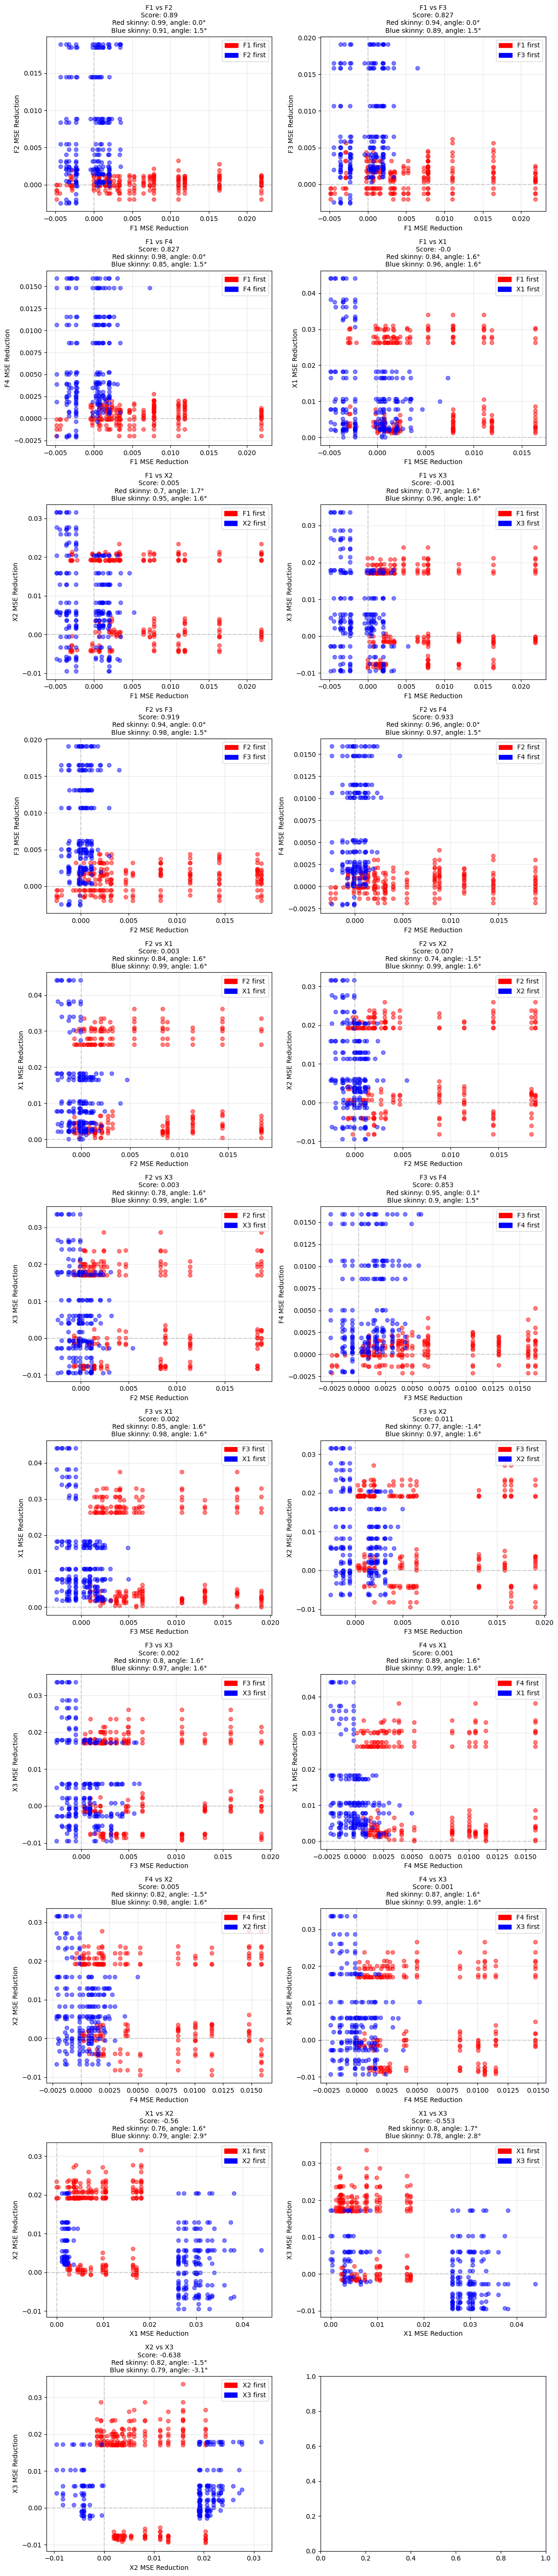

In [79]:
L_score_dict = {}
# Function to compute PCA metrics safely
def compute_pca_metrics(data):
    """Computes skinniness and horizontalness from PCA with error handling"""
    if len(data) < 3:  # Too few points for PCA
        return 1, 0, 0  # Neutral values
    
    pca = PCA(n_components=2)
    pca.fit(data)
    
    # Compute skinniness (avoid division errors)
    explained_variance = pca.explained_variance_ratio_
    skinniness = explained_variance[0] / explained_variance[1]
    skinniness = skinniness / (1 + skinniness)
    
    # Compute angle of first principal component
    first_component = pca.components_[0]
    angle = np.degrees(np.arctan2(first_component[1], first_component[0]))
    
    # Convert angle to horizontalness score
    horizontalness = np.cos(2 * np.radians(angle))
    
    return skinniness, horizontalness, angle

# Get unique features from the dataframe
features = np.sort(impact_df['added_feature'].unique())

# Create all possible feature pairs
feature_pairs = [(f1, f2) for i, f1 in enumerate(features) for f2 in features[i+1:]]

# Create plots for all feature pairs
fig, axes = plt.subplots(nrows=len(feature_pairs)//2 + 1, ncols=2, figsize=(12, 5 * (len(feature_pairs)//2 + 1)))

for ax, (feature1, feature2) in zip(axes.flatten(), feature_pairs):
    points = []  # Store (x, y, color)

    for row in impact_df.itertuples(index=False):
        if feature1 in row.added_feature and feature2 not in row.base_features:
            for row2 in impact_df.itertuples(index=False):
                if set(row.final_features) <= set(row2.base_features) and feature2 in row2.added_feature:
                    points.append((row.mse_reduction, row2.mse_reduction, 'red'))
        elif feature2 in row.added_feature and feature1 not in row.base_features:
            for row2 in impact_df.itertuples(index=False):
                if set(row.final_features) <= set(row2.base_features) and feature1 in row2.added_feature:
                    points.append((row2.mse_reduction, row.mse_reduction, 'blue'))

        # Handle feature1 or feature2 being the only feature present
        elif set([row.base_features]) == {feature1}:  # Only feature1 is added
            points.append((row.mse_reduction, 0, 'red'))
        elif set([row.base_features]) == {feature2}:  # Only feature2 is added
            points.append((0, row.mse_reduction, 'blue'))

    # Extract values for plotting
    if points:
        red_points = [p for p in points if p[2] == 'red']
        blue_points = [p for p in points if p[2] == 'blue']

        # Sample up to 500 points for efficiency
        red_points = random.sample(red_points, min(len(red_points), 500))
        blue_points = random.sample(blue_points, min(len(blue_points), 500))

        points = red_points + blue_points

        # Convert to numpy arrays for PCA
        x_vals, y_vals, colors = zip(*points)
        x_vals, y_vals = np.array(x_vals), np.array(y_vals)

        # Prepare data for PCA
        red_array = np.array([(x, y) for x, y, c in points if c == 'red'])
        blue_array = np.array([(x, y) for x, y, c in points if c == 'blue'])

        # Compute PCA metrics with fixes
        red_skinny, red_horiz, red_angle = compute_pca_metrics(red_array)
        blue_skinny, blue_horiz, blue_angle = compute_pca_metrics(blue_array)

        # Compute L-score safely
        L_score = (red_skinny * blue_skinny) * (red_horiz - blue_horiz) / 2
        L_score = round(L_score, 3)

    else:
        x_vals, y_vals, colors = [], [], []
        L_score = None  # No valid data for computation

    # Scatter plot
    ax.scatter(x_vals, y_vals, c=colors, alpha=0.5)

    # Add reference lines
    ax.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
    ax.axvline(x=0, color='gray', linestyle='--', alpha=0.3)

    # Set title with L-score and PCA details
    if L_score is not None:
        ax.set_title(
            f'{feature1} vs {feature2}\n'
            f'Score: {L_score}\n'
            f'Red skinny: {round(red_skinny, 2)}, angle: {round((np.deg2rad(red_angle)), 1)}°\n'
            f'Blue skinny: {round(blue_skinny, 2)}, angle: {round((np.deg2rad(blue_angle)), 1)}°',
            fontsize=10
        )
        L_score_dict[(feature1, feature2)] = L_score
    else:
        ax.set_title(f'{feature1} vs {feature2} | No Valid Data', fontsize=10)

    ax.set_xlabel(f'{feature1} MSE Reduction', fontsize=10)
    ax.set_ylabel(f'{feature2} MSE Reduction', fontsize=10)

    # Add custom legend
    red_patch = mpatches.Patch(color='red', label=f'{feature1} first')
    blue_patch = mpatches.Patch(color='blue', label=f'{feature2} first')
    ax.legend(handles=[red_patch, blue_patch], loc='upper right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [6]:
L_score_dict

{('X1', 'X2'): -0.512,
 ('X1', 'X3'): -0.185,
 ('X1', 'X4'): -0.542,
 ('X1', 'X5'): 0.042,
 ('X1', 'X6'): -0.392,
 ('X2', 'X3'): -0.517,
 ('X2', 'X4'): -0.624,
 ('X2', 'X5'): -0.569,
 ('X2', 'X6'): -0.566,
 ('X3', 'X4'): -0.372,
 ('X3', 'X5'): -0.327,
 ('X3', 'X6'): -0.498,
 ('X4', 'X5'): -0.625,
 ('X4', 'X6'): -0.434,
 ('X5', 'X6'): -0.288}

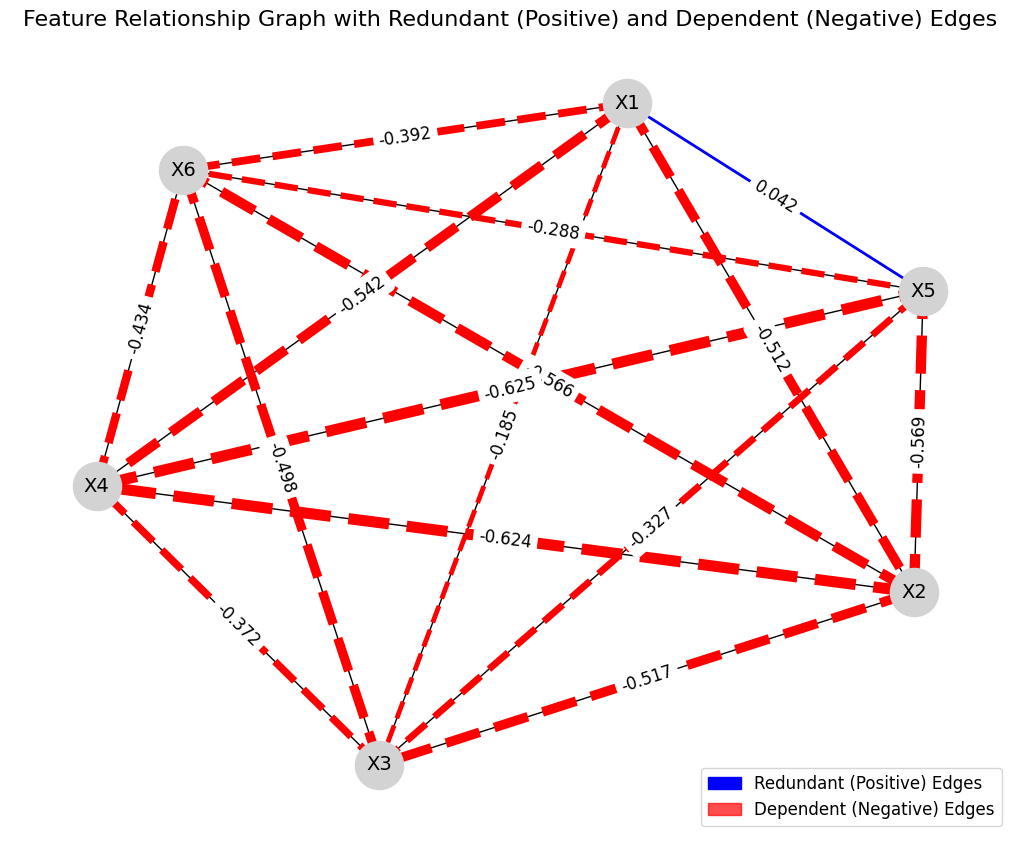

In [7]:

# Define the feature relationships (L_)
L_scores = L_score_dict

# Create a graph
G = nx.Graph()

# Add edges with weights
for (f1, f2), weight in L_scores.items():
    if weight != 0:  # Ignore close to zero values
        G.add_edge(f1, f2, weight=weight)

# Define node positions with increased spread
pos = nx.spring_layout(G, seed=42, k= 1.5)

# Normalize edge widths to keep thin edges visible
min_width, max_width = 2, 8  # Ensure visibility
weights = list(nx.get_edge_attributes(G, 'weight').values())
normalized_weights = [min_width + (max_width - min_width) * (abs(w) - min(map(abs, weights))) / (max(map(abs, weights)) - min(map(abs, weights)) + 1e-6) for w in weights]

# Define color styles for legend
positive_patch = mpatches.Patch(color="blue", label="Redundant (Positive) Edges")
negative_patch = mpatches.Patch(color="red", label="Dependent (Negative) Edges", alpha=0.7)

# Create the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightgray', font_size=14, node_size=1200)

# Draw positive and negative edges separately
for (f1, f2), weight in L_scores.items():
    if weight > 0:  # Positive edges (solid lightgray)
        nx.draw_networkx_edges(G, pos, edgelist=[(f1, f2)], width=normalized_weights.pop(0), edge_color="blue", style="solid")
    elif weight < 0:  # Negative edges (dashed lightblue)
        nx.draw_networkx_edges(G, pos, edgelist=[(f1, f2)], width=normalized_weights.pop(0), edge_color="red", style="dashed")

# Add edge labels (weights)
edge_labels = {(f1, f2): f"{weight:.3f}" for (f1, f2), weight in L_scores.items() if weight != 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Add legend to differentiate between positive (redundant) and negative (dependent) relationships
plt.legend(handles=[positive_patch, negative_patch], loc="lower right", fontsize=12)

plt.title("Feature Relationship Graph with Redundant (Positive) and Dependent (Negative) Edges", fontsize=16)
plt.show()


In [5]:


# Function to compute PCA metrics remains the same
def compute_pca_metrics_3d(data):
    if len(data) < 4:
        return 1, 0, 0, 0
    pca = PCA(n_components=3)
    pca.fit(data)
    explained_variance = pca.explained_variance_ratio_
    skinniness = explained_variance[0] / (explained_variance[1] + explained_variance[2])
    skinniness = skinniness / (1 + skinniness)
    first_component = pca.components_[0]
    angle_x = np.degrees(np.arctan2(first_component[1], first_component[0]))
    angle_y = np.degrees(np.arctan2(first_component[2], first_component[0]))
    horizontalness = np.cos(2 * np.radians(angle_x)) * np.cos(2 * np.radians(angle_y))
    return skinniness, horizontalness, angle_x, angle_y

features = impact_df['added_feature'].unique()
feature_triplets = [('X1', 'X2', 'X3')]

for f1, f2, f3 in feature_triplets:
    fig = make_subplots(
    rows=len(feature_triplets), cols=1,
    specs=[[{'type': 'scatter3d'}]] * len(feature_triplets),
    subplot_titles=[f"{f1}, {f2}, {f3}"],
    )

    fig.update_layout(
        scene=dict(
            xaxis_title=f"{f1} MSE Reduction",
            yaxis_title=f"{f2} MSE Reduction",
            zaxis_title=f"{f3} MSE Reduction"
        )
    )



for idx, (feature1, feature2, feature3) in enumerate(feature_triplets):
    points = []
                            
                            
    for row in impact_df.itertuples(index=False):
        if feature1 in row.added_feature and feature2 not in row.base_features and feature3 not in row.base_features:
            for row2 in impact_df.itertuples(index=False):
                if set(row.final_features) <= set(row2.base_features) and feature2 in row2.added_feature and feature3 not in row2.base_features:
                    for row3 in impact_df.itertuples(index=False):
                        if set(row2.final_features) <= set(row3.base_features) and feature3 in row3.added_feature:
                            points.append((row.mse_reduction, row2.mse_reduction, row3.mse_reduction, 'red'))
        elif feature2 in row.added_feature and feature1 not in row.base_features and feature3 not in row.base_features:
            for row2 in impact_df.itertuples(index=False):
                if set(row.final_features) <= set(row2.base_features) and feature1 in row2.added_feature and feature3 not in row2.base_features:
                    for row3 in impact_df.itertuples(index=False):
                        if set(row2.final_features) <= set(row3.base_features) and feature3 in row3.added_feature:
                            points.append((row2.mse_reduction, row.mse_reduction, row3.mse_reduction, 'blue'))
        elif feature3 in row.added_feature and feature1 not in row.base_features and feature2 not in row.base_features:
            for row2 in impact_df.itertuples(index=False):
                if set(row.final_features) <= set(row2.base_features) and feature1 in row2.added_feature and feature2 not in row2.base_features:
                    for row3 in impact_df.itertuples(index=False):
                        if set(row2.final_features) <= set(row3.base_features) and feature2 in row3.added_feature:
                            points.append((row3.mse_reduction, row.mse_reduction, row2.mse_reduction, 'green'))

        # Handle feature1 or feature2 being the only feature present
        elif set([row.base_features]) == {feature1}:  # Only feature1 is added
            points.append((row.mse_reduction, 0, 'red'))
        elif set([row.base_features]) == {feature2}:  # Only feature2 is added
            points.append((0, row.mse_reduction, 'blue'))
        elif set([row.base_features]) == {feature3}:  # Only feature3 is added
            points.append((0, 0, row.mse_reduction, 'green'))

    if points:
        red_points = [p for p in points if p[3] == 'red']
        blue_points = [p for p in points if p[3] == 'blue']
        green_points = [p for p in points if p[3] == 'green']

        red_points = random.sample(red_points, min(len(red_points), 300))
        blue_points = random.sample(blue_points, min(len(blue_points), 300))
        green_points = random.sample(green_points, min(len(green_points), 300))

        all_points = red_points + blue_points + green_points
        x_vals, y_vals, z_vals, colors = zip(*all_points)

        red_array = np.array([(x, y, z) for x, y, z, c in all_points if c == 'red'])
        blue_array = np.array([(x, y, z) for x, y, z, c in all_points if c == 'blue'])
        green_array = np.array([(x, y, z) for x, y, z, c in all_points if c == 'green'])

        red_skinny, red_horiz, red_angle_x, red_angle_y = compute_pca_metrics_3d(red_array)
        blue_skinny, blue_horiz, blue_angle_x, blue_angle_y = compute_pca_metrics_3d(blue_array)
        green_skinny, green_horiz, green_angle_x, green_angle_y = compute_pca_metrics_3d(green_array)

        L_score = (red_skinny * blue_skinny * green_skinny) * (red_horiz - blue_horiz - green_horiz) / 3
        L_score = round(L_score, 3)

        # Plot using Plotly
        scatter = go.Scatter3d(
            x=x_vals, y=y_vals, z=z_vals,
            mode='markers',
            marker=dict(size=4, color=colors, opacity=0.5),
            name=f'{feature1}, {feature2}, {feature3} | L-Score: {L_score}'
        )

        fig.add_trace(scatter, row=idx + 1, col=1)

fig.update_layout(
    height=500 * len(feature_triplets),
    showlegend=True,
    margin=dict(l=0, r=0, b=0, t=40)
)

# whow large window to see the plot
fig.show()



In [ ]:

# Define the feature relationships (L_)
L_scores = L_score_dict

# Create a graph
G = nx.Graph()

# Add edges with weights
for (f1, f2), weight in L_scores.items():
    if weight > 0:  # Ignore zero values
        G.add_edge(f1, f2, weight=weight)

# Define edge weights for visualization
edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

# Define node positions with increased spread
pos = nx.spring_layout(G, seed=42, k=1.5)  # 'k' controls node spacing

# Normalize edge widths to keep thin edges visible
min_width, max_width = 3, 8  # Minimum and maximum edge thickness
normalized_weights = [min_width + (max_width - min_width) * (w - min(weights)) / (max(weights) - min(weights) + 1e-6) for w in weights]

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color="lightgray",
        width=normalized_weights, edge_cmap=plt.cm.Blues, font_size=14, node_size=1200)

# Add edge labels (weights)
edge_labels = {(f1, f2): f"{weight:.3f}" for (f1, f2), weight in L_scores.items() if weight > 0}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("Feature Relationship Graph with Improved Edge Visibility", fontsize=16)
plt.show()


In [30]:
from gplearn.genetic import SymbolicRegressor
from sklearn.model_selection import train_test_split

import pandas as pd

# Load your data
df = pd.read_csv("temp.csv")

# Try to rediscover X2 as a function of X1
X = df[['X1']]
y = df['X2']

# Symbolic Regression model
model = SymbolicRegressor(generations=20, population_size=500, verbose=1)
model.fit(X, y)

# Print discovered formula
print("Discovered expression for X2:", model._program)


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    45.96       1.6728e+06       31         0.578613              N/A      6.08s
   1    17.65          2.45326       27         0.289253              N/A      2.69s
   2    18.92          1.51614       23         0.217276              N/A      2.19s
   3    23.04          1.88279       23         0.217276              N/A      2.79s
   4    23.96          2.32526       27          0.20212              N/A      2.68s
   5    25.92          2.41329       25         0.143677              N/A      2.34s
   6    25.38          1.86323       35         0.130082              N/A      1.84s
   7    24.88          2.26117       35         0.130082              N/A      1.55s
   8    28.04          1.47094       41         0.121683              N/A  